Background

Twitter has become a wildly sprawling jungle of information—140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out per day. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

Choose one of the following two assignments, in which you will do just that. Good luck!


News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.


In [1]:
import pandas as pd
import numpy as np
import tweepy
import json 
from tweepy.parsers import JSONParser
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import matplotlib.patches as mpatches


In [2]:
Consumer_Key = "FSfjjE3eU8euI2t2VUJGh009v"
Consumer_Secret = "B4NEEiXmBOnmJyHS5zo7VxbbMFvjw9DbglolN9c3Nj9ObQYZKU"
Access_Token = "942094172969828352-WCe9ZgRKy30MKWLFYfeWUtzJCCDft7G"
Access_Token_Secret = "XHab1ABIUXKIW2SQrWtH48HImrOHxKqfdwUxRbmUFvylm"

auth = tweepy.OAuthHandler(Consumer_Key, Consumer_Secret)
auth.set_access_token(Access_Token, Access_Token_Secret)

api = tweepy.API(auth, parser=JSONParser())

In [3]:
news_orgs = ["BBC", "CBS", "CNN", "Fox","New York times"]

In [4]:
response = api.search_users("BBC")
fg = response[0]
fg["screen_name"]


'BBCWorld'

In [5]:
news_orgs_df = pd.DataFrame({"News Organization":news_orgs, "User Name":""})

In [6]:
for index, row in news_orgs_df.iterrows():
    try:
        response = api.search_users(row["News Organization"])
        name = response[0]
        screenName = name["screen_name"]
        
        news_orgs_df.set_value(index, "User Name",  screenName)
    except:
        print("not on twitter")
news_orgs_df

,News Organization,User Name
0,BBC,BBCWorld
1,CBS,CBS
2,CNN,CNN
3,Fox,FOXTV
4,New York times,nytimes


In [7]:
analyzer = SentimentIntensityAnalyzer()


In [8]:
bbc_texts = []
cbs_text = []
cnn_text = []
fox_text = []
nyt_text = []

In [9]:
for index, row in news_orgs_df.iterrows():
    public_tweets = api.user_timeline(row["User Name"], count = 100)
    for tweet in public_tweets:
        if row["User Name"] == "BBCWorld":
            bbc_c = analyzer.polarity_scores(tweet["text"])["compound"]
            bbc_texts.append(bbc_c)
            
        if row["User Name"] == "CBS":
            cbs_c = analyzer.polarity_scores(tweet["text"])["compound"]
            cbs_text.append(cbs_c)
            
        if row["User Name"] == "CNN":
            cnn_c = analyzer.polarity_scores(tweet["text"])["compound"]
            cnn_text.append(cnn_c)
            
        if row["User Name"] == "FOXTV":
            fox_c = analyzer.polarity_scores(tweet["text"])["compound"]
            fox_text.append(fox_c)
            
        if row["User Name"] == "nytimes":
            nyt_c = analyzer.polarity_scores(tweet["text"])["compound"]
            nyt_text.append(nyt_c)
    

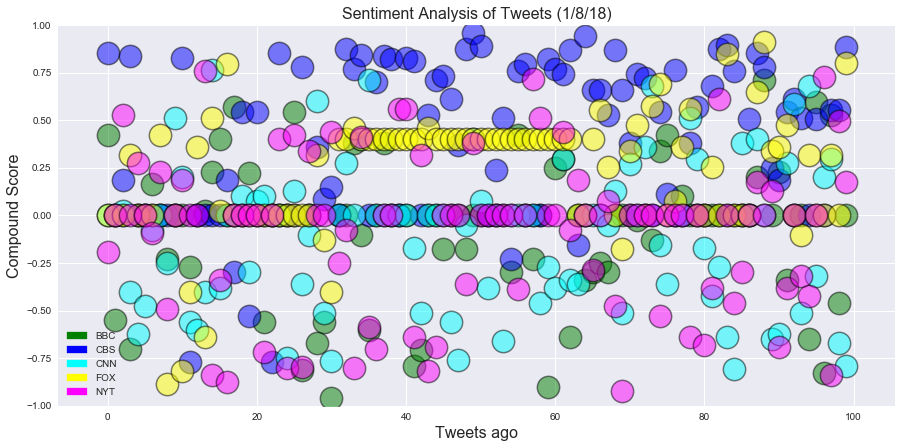

In [39]:
sns.set()
plt.figure(figsize=(15,7))
plt.title("Sentiment Analysis of Tweets (1/8/18)", fontsize=16)
plt.ylabel("Compound Score", fontsize=16)
plt.xlabel("Tweets ago", fontsize=16)
plt.ylim(-1,1)


#blue_line = mlines.Line2D([], [], color='blue', marker='o',
                          #markersize=15, label='CBS')
#green_line = mlines.Line2D([], [], color='green', marker='o',
                          #markersize=15, label='BBC')

green_patch = mpatches.Patch(color='green', label='BBC')
blue_patch = mpatches.Patch(color='blue', label='CBS')
cyan_patch = mpatches.Patch(color='cyan', label='CNN')
yellow_patch = mpatches.Patch(color='yellow', label='FOX')
magenta_patch = mpatches.Patch(color='magenta', label='NYT')


plt.legend(handles=[green_patch, blue_patch, cyan_patch, yellow_patch, magenta_patch])


plt.scatter(x = np.arange(len(bbc_texts)), y = bbc_texts, color = "green", edgecolor = "black", alpha = .5, linewidth=1.5, s = 500, cmap=True)
plt.scatter(x = np.arange(len(cbs_text)), y = cbs_text, color = "blue", edgecolor = "black", alpha = .5,linewidth=1.5, s = 500, cmap=True)
plt.scatter(x = np.arange(len(cnn_text)), y = cnn_text, color = "cyan", edgecolor = "black", alpha = .5, linewidth=1.5, s = 500, cmap=True)
plt.scatter(x = np.arange(len(fox_text)), y = fox_text, color = "yellow", edgecolor = "black", alpha = .5, linewidth=1.5, s = 500, cmap=True)
plt.scatter(x = np.arange(len(nyt_text)), y = nyt_text, color = "magenta", edgecolor = "black", alpha = .5, linewidth=1.5, s = 500, cmap=True)

plt.show()


In [27]:
avg = [bbc_texts, cbs_text, cnn_text, fox_text, nyt_text]
new_list = []
for x in avg:
    new_list.append(np.mean(x))

In [28]:
new_list

[-0.060933999999999988,
 0.39639200000000002,
 -0.086679999999999993,
 0.21741700000000003,
 -0.077924999999999994]

In [34]:
labels = ("BBC", "CBS", "CNN", "Fox", "New York times")

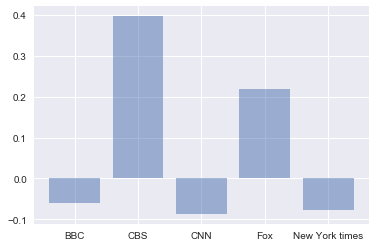

In [37]:
plt.bar(np.arange(len(news_orgs_df)), new_list, align='center', alpha=0.5)
plt.xticks(np.arange(len(news_orgs_df)), news_orgs_df["News Organization"])
plt.ylabel('Over all Sentiment')
plt.title('Overall Media Sentitment')
 
plt.show()